In [5]:
# %load styles.py
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2
from matplotlib.colors import colorConverter
import prettyplotlib as ppl
from matplotlib import rcParams
import seaborn as sns

sns.set(style='ticks', palette='Set1') 
sns.despine()

import itertools

# These are the colors. Notice how this is programmed:
# You initialize your colors by 
# colorset = palette()
# then you can cycle through the colors:
# color = next(colorset)
# if you want your set to be reset, just create
# a new palette() instance! This way the colors do not interfere.

color_names = ['windows blue', "pale red", "faded green", "amber", 
          'dark green', 'dark fuchsia', 'browny orange', 
          'puke green', 'dark royal blue', 'dusty purple', 
               'red orange','dark grey','blue grey', 'bright purple', 'chocolate brown',
              'shit', 'pistachio','stone','asparagus','butter']

colors = sns.xkcd_palette(color_names)
palette = lambda: itertools.cycle(sns.xkcd_palette(color_names) )

fontsize_labels = 26    # size used in latex document
rcParams['text.latex.preamble'] = [r'\usepackage[cmbright]{sfmath}']
rcParams['font.family']= 'sans-serif'
rcParams['font.sans-serif']= 'cmbright'
rcParams['font.weight'] = "light"

rcParams['text.usetex'] = True

rcParams['figure.autolayout'] = True
rcParams['font.size'] = fontsize_labels
rcParams['axes.labelsize'] = fontsize_labels
rcParams['xtick.labelsize'] = fontsize_labels
rcParams['ytick.labelsize'] = fontsize_labels
rcParams['legend.fontsize'] = fontsize_labels
rcParams['legend.markerscale'] = 4
rcParams['axes.titlesize'] = fontsize_labels
rcParams['text.color'] = "0.3"
rcParams['xtick.color'] = "0.3"
rcParams['ytick.color'] = "0.3"
rcParams['axes.labelcolor'] = "0.3"
rcParams['axes.edgecolor'] = "0.8"
rcParams['axes.formatter.limits'] = (-2,3)

xfactor = 2
rcParams['figure.figsize'] = (xfactor*6.2, xfactor*3.83)  

fig_dir = "./figures/"  # directory of figures
save_fig = True

def savefig(filename):
    if save_fig == True:
        plt.savefig(fig_dir+filename+".pdf")

def fixticks(ax):    
    for t in ax.xaxis.get_ticklines(): t.set_color('0.8')
    for t in ax.yaxis.get_ticklines(): t.set_color('0.8')


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [52]:
import pandas as pd
import numpy as np

In [28]:
xl = pd.ExcelFile("./report.xlsx")

In [29]:
xl.sheet_names

['Sources', 'Series-layout A', 'Units and Notes-layout A', 'Series-layout B']

In [30]:
data = xl.parse("Series-layout A")

In [31]:
data.head()

,Variable code,Unnamed: 1,1110101,1110201,1110301,1110401,1110501,1110701,1120101,1120201,...,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60
0,Country,Year,Top 10% income share,Top 5% income share,Top 1% income share,Top 0.5% income share,Top 0.1% income share,Top 0.01% income share,Top 10-5% income share,Top 5-1% income share,...,Top 0.5-0.1% average income-including capital ...,Top 0.1-0.01% average income-including capital...,P90 income threshold-including capital gains,P95 income threshold-including capital gains,P99 income threshold-including capital gains,P99.5 income threshold-including capital gains,P99.9 income threshold-including capital gains,P99.99 income threshold-including capital gains,Pareto-Lorenz coefficient,Inverted Pareto-Lorenz coefficient
1,Germany,1891,37.92,29.95,17.28,13.56,7.44,2.79,7.97,12.67,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Germany,1892,37.47,29.45,16.81,13.15,7.18,2.67,8.02,12.64,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Germany,1893,37.21,29.21,16.59,12.95,7.04,2.61,8.01,12.62,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Germany,1894,37.13,29.18,16.59,12.98,7.1,2.66,7.94,12.59,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


/usr/lib/python3.4/site-packages/matplotlib/figure.py:1653: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


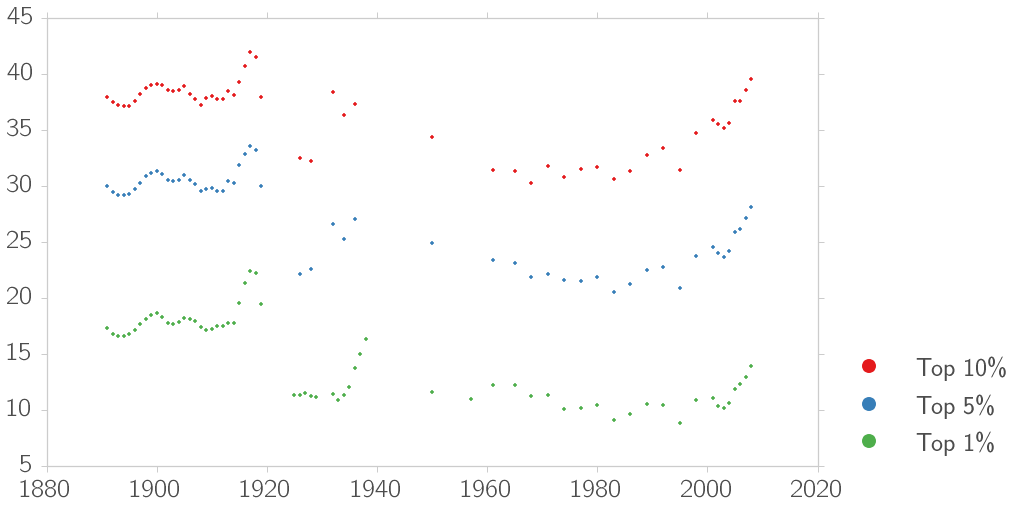

In [73]:
fig, ax = plt.subplots()
fixticks(ax)
ax.xaxis.get_major_formatter().set_powerlimits((0, 6))
top10  = data[1110101][1::]
cc10   = top10.notnull()

top5   = data[1110201][1::]
cc5   = top5.notnull()

top1   = data[1110301][1::]
cc1   = top1.notnull()

top05  = data[1110401][1::]
cc05   = top05.notnull()

top01  = data[1110501][1::]
cc01   = top01.notnull()

top001 = data[1110701][1::]
cc001   = top001.notnull()

ax.plot((data["Unnamed: 1"][1::])[cc10], top10[cc10],".", label = "Top 10\%")
ax.plot((data["Unnamed: 1"][1::])[cc5], top5[cc5],".", label = "Top 5\%")
ax.plot((data["Unnamed: 1"][1::])[cc1], top1[cc1],".", label = "Top 1\%")
ax.legend(loc = (1.02,0))

plt.show()

In [66]:
data

Index(['Variable code',    'Unnamed: 1',         1110101,         1110201,
               1110301,         1110401,         1110501,         1110701,
               1120101,         1120201,         1120301,         1120401,
               1120701,         1210101,         1210201,         1210301,
               1210401,         1210501,         1210701,         1220101,
               1220201,         1220301,         1220401,         1220701,
         'Unnamed: 24',   'Unnamed: 25',   'Unnamed: 26',   'Unnamed: 27',
         'Unnamed: 28',   'Unnamed: 29',   'Unnamed: 30',   'Unnamed: 31',
         'Unnamed: 32',   'Unnamed: 33',   'Unnamed: 34',   'Unnamed: 35',
         'Unnamed: 36',   'Unnamed: 37',   'Unnamed: 38',   'Unnamed: 39',
         'Unnamed: 40',   'Unnamed: 41',   'Unnamed: 42',   'Unnamed: 43',
         'Unnamed: 44',   'Unnamed: 45',   'Unnamed: 46',   'Unnamed: 47',
         'Unnamed: 48',   'Unnamed: 49',   'Unnamed: 50',   'Unnamed: 51',
         'Unnamed: 52',  